<a href="https://colab.research.google.com/github/gregory-mc/Machine-Learning-Inmersion/blob/main/TratamientoIngenieriaVariables_Notebook01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#########################################################################
#########------- Machine Learning Inmersion ------------#################
#########################################################################
# Capacitador: André Omar Chávez Panduro
# email: andre.chavez@urp.edu.pe
# Tema:  Tratamiento e Ingeniería Variables
# version: 1.0
#########################################################################

### **Tratamiento e Ingeniería Variables**

La ingeniería de características es el proceso de usar el conocimiento del dominio para extraer características de datos sin procesar a través de técnicas de minería de datos. Estas características se pueden usar para mejorar el rendimiento de los algoritmos de aprendizaje automático.

In [ ]:
# Conexion a Google Colaborative
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Carga de base de datos**

Desarrollar el mejor modelo de propensión que prediga si se logrará la venta de un préstamo digital.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/MLIPy/S3/dataBasePrestDigital.csv',sep=";")

In [ ]:
df.head()

,mes,cliente,estadoCliente,rngEdad,genero,rngSueldo,procedencia,operDigital,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,tenTarjeta,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,ventaPrestDig
0,201608,1,A,<35-45],M,<3500-4500],lima,NN,0,0.000000,1,3,TC-TD,5844.17,5844.17,5844.170000,0.0,1.0,0,0
1,201608,2,A,<25-35],M,<3500-4500],lima,BXI-BM,200,192.666667,1,3,TC-TD,0.00,0.00,2701.470000,0.0,0.0,0,0
2,201608,3,A,<35-45],F,<4500-6000],lima,BM,407,332.333333,1,3,TD,0.00,0.00,3148.746667,0.0,0.0,0,0
3,201608,4,A,<25-35],F,<3500-4500],lima,NN,0,0.000000,1,1,NN,67.67,67.67,67.670000,0.0,1.0,0,0
4,201608,5,A,<35-45],F,<=1000,lima,NN,0,0.000000,1,1,TD,0.00,0.00,0.000000,0.0,0.0,0,0


In [ ]:
# Vemos la distribucion del target!
df.ventaPrestDig.value_counts()/len(df)*100

0    99.722812
1     0.277188
Name: ventaPrestDig, dtype: float64

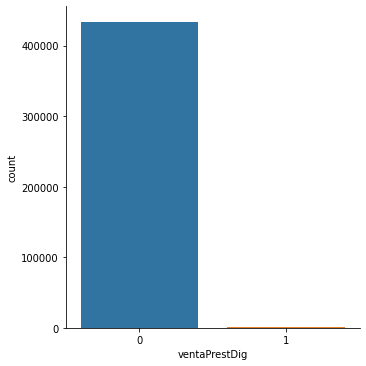

In [ ]:
# Visualizando la variable target
sns.factorplot('ventaPrestDig',data=df,kind="count")

In [ ]:
# Visualizamos los registros del dataset
df.head(3)

In [ ]:
### **2. Tratamientos o Recodificacion de variables**

In [ ]:
ColumnsCategoricas = ['estadoCliente','rngEdad','genero','rngSueldo','procedencia','operDigital','tenTarjeta']
ColumnsNumericas =   ['trxDigitalUm','promTrxDig3Um','recCamp','frecCamp','promConsBanco3Um','promSaldoBanco3Um','promSaldoTc3Um','promSaldoPrest3Um','sowTcUm','sowPrestUm']

In [ ]:
# Antes de hacer cualquier trabajo con los datos, vemos los valores nulos!
df.isnull().sum()

mes                  0
cliente              0
estadoCliente        0
rngEdad              0
genero               0
rngSueldo            0
procedencia          0
operDigital          0
trxDigitalUm         0
promTrxDig3Um        0
recCamp              0
frecCamp             0
tenTarjeta           0
promConsBanco3Um     0
promSaldoBanco3Um    0
promSaldoTc3Um       0
promSaldoPrest3Um    0
sowTcUm              0
sowPrestUm           0
ventaPrestDig        0
dtype: int64

In [ ]:
# Creamos 2 dataset de variables categoricas!
df_categoricas_01 = df[ColumnsCategoricas]
df_categoricas_02 = df[ColumnsCategoricas]

In [ ]:
# Tratamiento de Variables Categoricas
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

for c in df_categoricas_01:
    print(str(c))
    le = LabelEncoder()
    le.fit(df_categoricas_01[str(c)])
    df_categoricas_01[str(c)]=le.transform(df_categoricas_01[str(c)]) 

estadoCliente
rngEdad
genero
rngSueldo
procedencia
operDigital
tenTarjeta


In [ ]:
# Tratamiento de Variables Categoricas
# Preprocesamiento con OneHotEncoder
df_categoricas_03 = pd.get_dummies(df_categoricas_02)

In [ ]:
# Al final hasta tenemos 2 set de datos o dataset's para poder trabajar!

In [ ]:
# Concatenamos la informacion para seguir con el analisis!
df2 = pd.concat([df[ColumnsNumericas],df_categoricas_01,df.ventaPrestDig],axis=1)

In [ ]:
# Hacemos un resumen rapido de las variables numericas
# Es muy importante analizar las variables cuantitativas :
df2.describe()

,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,estadoCliente,rngEdad,genero,rngSueldo,procedencia,operDigital,tenTarjeta,ventaPrestDig
count,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000,435083.000000
mean,42.601991,39.123526,16.935153,1.936840,822.585136,491.166213,2002.220798,1665.058009,0.105745,0.000002,0.099760,1.391675,0.562203,1.337979,0.570167,2.477633,2.075057,0.002772
std,128.501383,114.435858,36.090774,1.149609,4619.738770,2532.848787,5144.381844,7763.036612,0.290548,0.001516,0.301287,1.321017,0.496116,1.465365,0.495053,0.944389,1.159452,0.052576
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,232.333333,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.000000
75%,9.000000,12.666667,1.000000,3.000000,0.000000,0.000000,1836.060000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000,3.000000,3.000000,0.000000
max,8267.000000,6291.333333,99.000000,3.000000,280967.576700,153971.113300,173735.230000,628000.000000,1.000000,1.000000,2.000000,4.000000,1.000000,4.000000,1.000000,3.000000,3.000000,1.000000


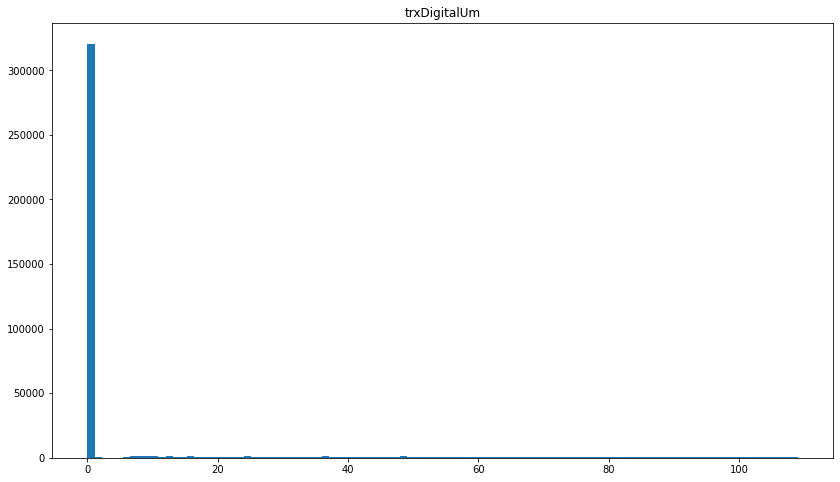

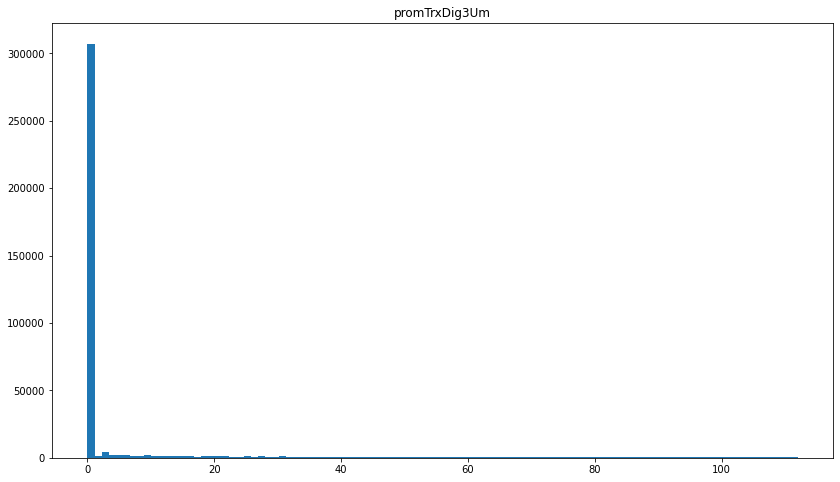

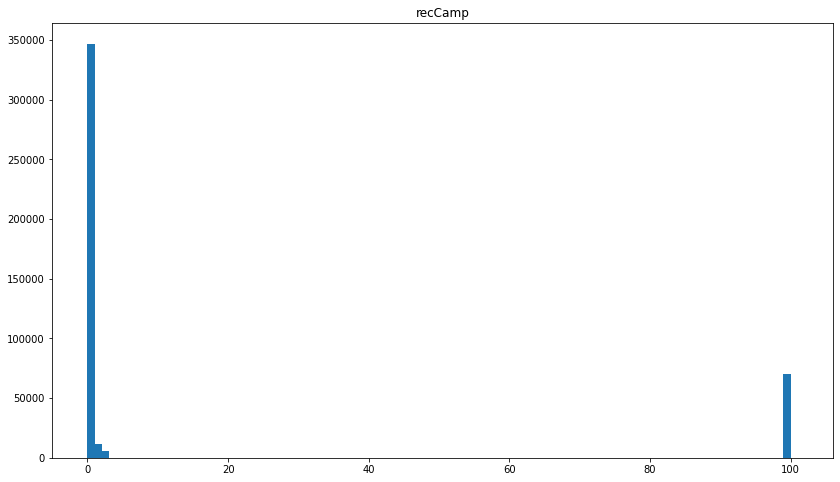

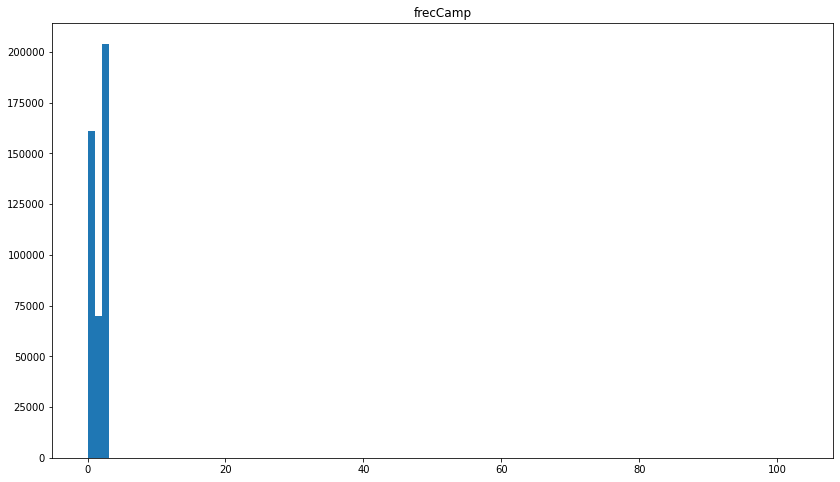

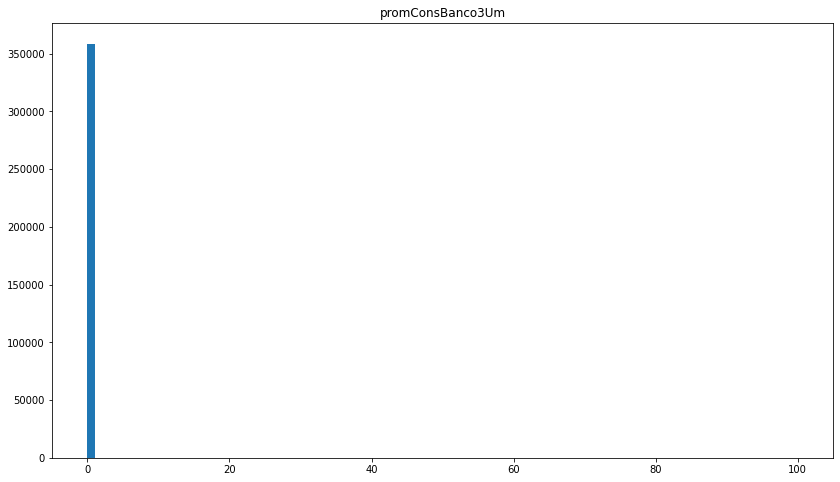

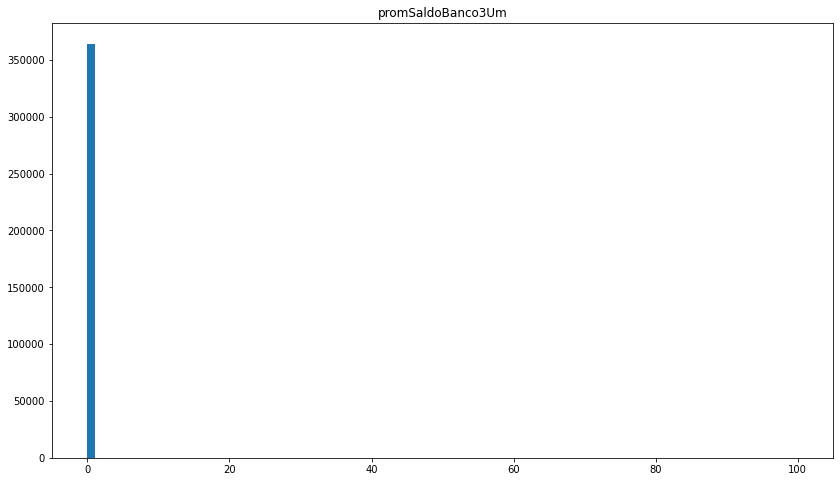

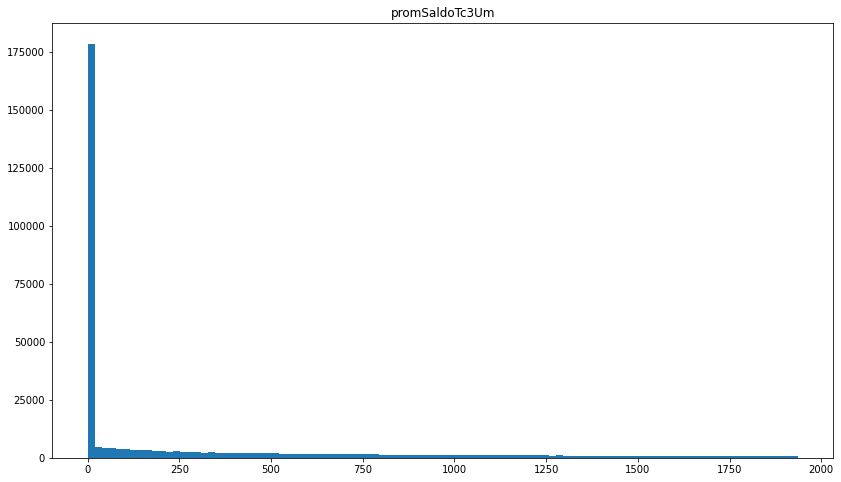

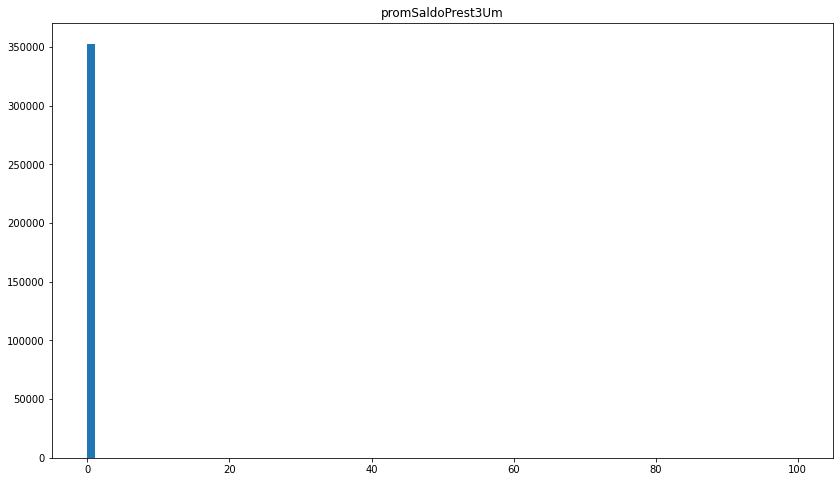

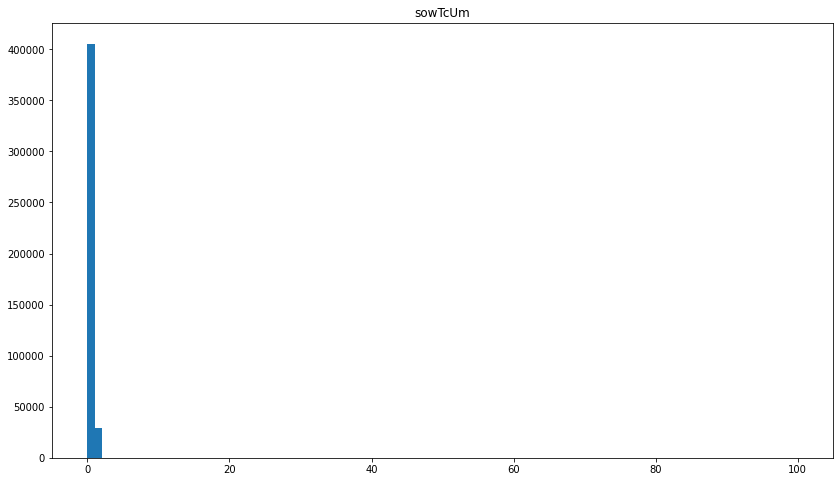

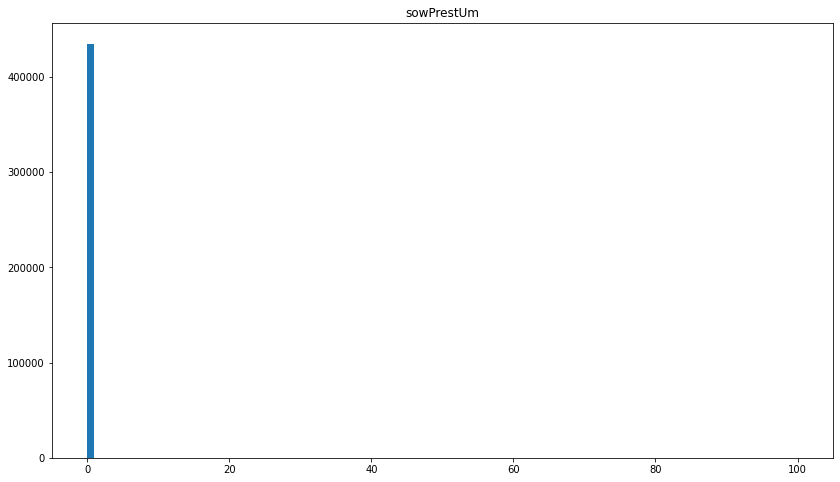

In [ ]:
# Ayuda visual
for x in ColumnsNumericas:
  Q03 = int(df2[x].quantile(0.75))+100
  plt.title(df2[x].name)
  plt.hist(df2[x], bins= 100 ,range=(0,Q03))
  plt.show()

### **3. Ingeniería de variables o Feature Enginnering**

In [ ]:
# Vista de las variables!

In [ ]:
# Ingenieria de Variables por Criterio Experto o Decision de Negocio!
df2['promConsSaldoBanco3Um']        =  df2['promConsBanco3Um'] / (df2['promSaldoBanco3Um'] +1)
# Debemos pensar algunas más!
df2['promSaldoCamp']        =  df2['promSaldoBanco3Um'] / (df2['frecCamp'] +1)
df2['promSaldoTc3UmIngreso']        =  df2['promSaldoTc3Um'] / (df2['rngSueldo'] +1)

In [ ]:
# Ingenieria de Variables por Transformaciones no Lineales!
df2['log_promTrxDig3Um']            =  np.log1p(df2['promTrxDig3Um']+1) #Por la distribucion asimetrica de la variable
# Debemos pensar algunas más!



In [ ]:
# Vista de las variables!

In [ ]:
#df2.dtypes

In [ ]:
# Ingenieria de Variables con Features polinómicos!
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias= False) # Definimos el grado del polinomio
to_cross = ['promTrxDig3Um', 'promConsBanco3Um', 'promSaldoBanco3Um']          # Definimos las variables con las que queremos jugar!

crossed_feats = poly.fit_transform(df2[to_cross].values)                       # Aplicamos la transformacion polinomica.

In [ ]:
# Guardamos los nuevos features en un dataframe
crossed_feats = pd.DataFrame(crossed_feats) # Revision de las nuevas variables que crea!

In [ ]:
# Entendemos lo necesario a extraer!
# Logica: 1^2,1*2,1*3,2^2,2*3,3^2
crossed_feats = pd.DataFrame(crossed_feats.iloc[:,3:9].to_numpy(),columns=['promTrxDig3Um_2','promTrxDig3Um_promConsBanco3Um','promTrxDig3Um_promSaldoBanco3Um','promConsBanco3Um_2','promConsBanco3Um_promSaldoBanco3Um','promSaldoBanco3Um_2'])

In [ ]:
# Concatenamos la informacion!
df3=pd.concat([df2,crossed_feats],axis=1)

### **4. Selección de variables o Feature Selection**

In [ ]:
# Selección por WOESS!

In [ ]:
final_iv, IV = data_vars(df3,df3.ventaPrestDig)

In [ ]:
# Ordenamos el ordenamiento!
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
16,promTrxDig3Um,1.567889e+00
17,promTrxDig3Um_2,1.567889e+00
3,log_promTrxDig3Um,1.562976e+00
26,trxDigitalUm,1.432419e+00
25,tenTarjeta,6.059407e-01
4,operDigital,4.572440e-01
18,promTrxDig3Um_promConsBanco3Um,4.529478e-01
19,promTrxDig3Um_promSaldoBanco3Um,3.999043e-01
20,recCamp,3.568408e-01
7,promConsBanco3Um_2,3.045500e-01


In [ ]:
# Podemos para ser ordenados, separar las covariables del target!
x= df3.drop('ventaPrestDig',axis=1)
y= df3.ventaPrestDig

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(x,y)                                     # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_           # Paso04: Variables importantes

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(x.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables.head()

,Driver,Importancia
0,promSaldoTc3UmIngreso,0.095340
1,promSaldoTc3Um,0.092887
2,log_promTrxDig3Um,0.087367
3,promTrxDig3Um_2,0.087041
4,promTrxDig3Um,0.086811


### **5. Modelamiento de información**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Vamos a generar nuestro primer algoritmo predictivo o de machine learning!

In [ ]:
#Separación de predictoras y predicha
X = df3.drop('ventaPrestDig',axis=1)
y = df3.ventaPrestDig

In [ ]:
#Creación de muestras de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [ ]:
# Instanciamos el algoritmo de clasificacion!
tree = DecisionTreeClassifier()

In [ ]:
# Entrenamos!
tree_model = tree.fit(X_train,y_train) # ajustando el modelo a mis datos

In [ ]:
# Predecimos!
Y_pred = tree_model.predict(X_test) # realizando la predicción

In [ ]:
#Cálculo del accuracy
accuracy_score(y_test,Y_pred)

In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test,Y_pred)
conf_mat


In [ ]:
# Visualizando la matriz de confusión
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
# Visualizando el arbol!
#utils.draw_tree(m, x)

### **6. Balanceo de Muestras**

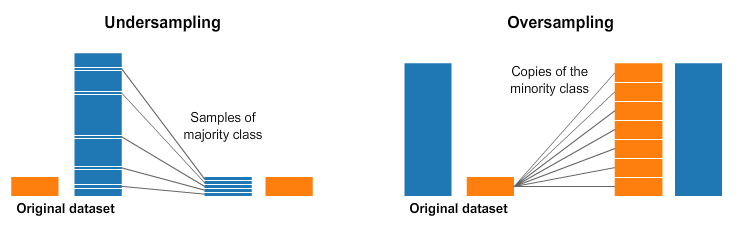

In [ ]:
# Conteo de clases
count_class_0, count_class_1 = df3.ventaPrestDig.value_counts()

In [ ]:
# Dividiendo los sets por clases
df_class_0 = df3[df3['ventaPrestDig'] == 0]
df_class_1 = df3[df3['ventaPrestDig'] == 1]

In [ ]:
print('Cantidades por fila de clase:')
print(df_class_0.shape)
print(df_class_1.shape)



#### 3.1. Random under-sampling (Submuestreo aleatorio)

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under,df_class_1],axis = 0)



In [ ]:
print('Dimensión por tipo de clases generadas:')
print('dim df_class_0_under:',df_class_0_under.shape)
print('dim df_under:',df_under.shape)

In [ ]:
print('Random under-sampling:')
print(df_under.ventaPrestDig.value_counts())

In [ ]:
df_under.ventaPrestDig.value_counts().plot(kind='bar', title='Count (ventaPrestDig)');

## Probando la predicción con data balanceada

In [ ]:
# Separación de predictoras y predicha
# DataSet:df_under


In [ ]:
#! pip install woe

In [ ]:
# Anexos : WOE
import woe
from woe.eval import plot_ks
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import warnings
warnings.filterwarnings('ignore')
max_bin = 20
force_bin = 3


# Creamos las Woes - IV
max_bin = 20
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)


def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)


def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
import numpy as np
import pandas as pd
import graphviz, IPython
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.ticker import FuncFormatter
from sklearn.tree import export_graphviz

def draw_tree(tree, df):
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True)
    return graphviz.Source(s)

def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

# Based on https://github.com/chrispaulca/waterfall.git
def waterfallplot(sample, data, Title="", x_lab="", y_lab="",
		 formatting="{:,.1f}", green_color='#29EA38', red_color='#FB3C62', blue_color='#24CAFF',
		 sorted_value=False, threshold=None, other_label='other', net_label='net', 
		 rotation_value=0, size=None):
	'''
	Given two sequences ordered appropriately, generate a standard waterfall chart.
	Optionally modify the title, axis labels, number formatting, bar colors, 
	increment sorting, and thresholding. Thresholding groups lower magnitude changes
	into a combined group to display as a single entity on the chart.
	'''
	
	#convert data and index to np.array
	index = np.array([f'{c}\n({sample[c].iloc[0]})' for c in sample])
	data = np.array(data)
	
	# wip
	#sorted by absolute value 
	if sorted_value: 
		abs_data = abs(data)
		data_order = np.argsort(abs_data)[::-1]
		data = data[data_order]
		index = index[data_order]
	
	#group contributors less than the threshold into 'other' 
	if threshold:
		
		abs_data = abs(data)
		threshold_v = abs_data.max()*threshold
		
		if threshold_v > abs_data.min():
			index = np.append(index[abs_data>=threshold_v],other_label)
			data = np.append(data[abs_data>=threshold_v],sum(data[abs_data<threshold_v]))
	
	changes = {'amount' : data}
	
	#define format formatter
	def money(x, pos):
		'The two args are the value and tick position'
		return formatting.format(x)
	formatter = FuncFormatter(money)
	
	fig, ax = plt.subplots(figsize=size)
	ax.yaxis.set_major_formatter(formatter)

	#Store data and create a blank series to use for the waterfall
	trans = pd.DataFrame(data=changes,index=index)
	blank = trans.amount.cumsum().shift(1).fillna(0)
	
	trans['positive'] = trans['amount'] > 0

	#Get the net total number for the final element in the waterfall
	total = trans.sum().amount
	trans.loc[net_label]= total
	blank.loc[net_label] = total

	#The steps graphically show the levels as well as used for label placement
	step = blank.reset_index(drop=True).repeat(3).shift(-1)
	step[1::3] = np.nan

	#When plotting the last element, we want to show the full bar,
	#Set the blank to 0
	blank.loc[net_label] = 0
	
	#define bar colors for net bar
	trans.loc[trans['positive'] > 1, 'positive'] = 99
	trans.loc[trans['positive'] < 0, 'positive'] = 99
	trans.loc[(trans['positive'] > 0) & (trans['positive'] < 1), 'positive'] = 99
	
	trans['color'] = trans['positive']
	
	trans.loc[trans['positive'] == 1, 'color'] = green_color
	trans.loc[trans['positive'] == 0, 'color'] = red_color
	trans.loc[trans['positive'] == 99, 'color'] = blue_color
	
	my_colors = list(trans.color)
	
	#Plot and label
	my_plot = plt.bar(range(0,len(trans.index)), blank, width=0.5, color='white')
	plt.bar(range(0,len(trans.index)), trans.amount, width=0.6,
			 bottom=blank, color=my_colors)       
								   
	
	# connecting lines - figure out later
	#my_plot = lines.Line2D(step.index, step.values, color = "gray")
	#my_plot = lines.Line2D((3,3), (4,4))
	
	#axis labels
	plt.xlabel("\n" + x_lab)
	plt.ylabel(y_lab + "\n")

	#Get the y-axis position for the labels
	y_height = trans.amount.cumsum().shift(1).fillna(0)
	
	temp = list(trans.amount)
	
	# create dynamic chart range
	for i in range(len(temp)):
		if (i > 0) & (i < (len(temp) - 1)):
			temp[i] = temp[i] + temp[i-1]
	
	trans['temp'] = temp
			
	plot_max = trans['temp'].max()
	plot_min = trans['temp'].min()
	
	#Make sure the plot doesn't accidentally focus only on the changes in the data
	if all(i >= 0 for i in temp):
		plot_min = 0
	if all(i < 0 for i in temp):
		plot_max = 0
	
	if abs(plot_max) >= abs(plot_min):
		maxmax = abs(plot_max)   
	else:
		maxmax = abs(plot_min)
		
	pos_offset = maxmax / 40
	
	plot_offset = maxmax / 15 ## needs to me cumulative sum dynamic

	#Start label loop
	loop = 0
	for index, row in trans.iterrows():
		# For the last item in the list, we don't want to double count
		if row['amount'] == total:
			y = y_height[loop]
		else:
			y = y_height[loop] + row['amount']
		# Determine if we want a neg or pos offset
		if row['amount'] > 0:
			y += (pos_offset*2)
			plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'g', fontsize=9)
		else:
			y -= (pos_offset*4)
			plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'r', fontsize=9)
		loop+=1

	#Scale up the y axis so there is room for the labels
	plt.ylim(plot_min-round(3.6*plot_offset, 7),plot_max+round(3.6*plot_offset, 7))
	
	#Rotate the labels
	plt.xticks(range(0,len(trans)), trans.index, rotation=rotation_value)
	
	#add zero line and title
	plt.axhline(0, color='black', linewidth = 0.6, linestyle="dashed")
	plt.title(Title)
	plt.tight_layout()

	return plt

In [ ]:
from sklearn.metrics import mean_squared_error